## Predict whether a tumor is malignant or benign based on medical features.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.shape

(569, 31)

In [11]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

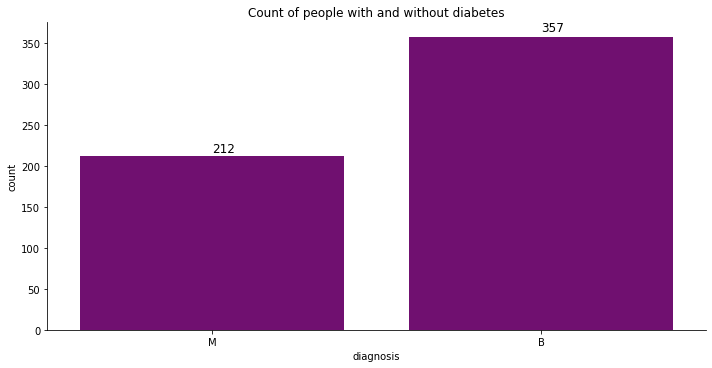

In [12]:
g = sns.catplot(x = "diagnosis", data=df, aspect=2, kind="count", color='purple')
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() * 1.02, 
            format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.title('Count of people with and without diabetes', color='black')
plt.show()

## Label diagnosis to 1/0

In [13]:
df['target'] = np.where(df['diagnosis'] == "M", 1, 0)  # setting value 1 for M and 0 for B

# Drop diagnosis to retain only target

In [14]:
df = df.drop(['diagnosis'], axis=1)

In [15]:
numeric = df.select_dtypes(include=['float64', 'int64'])

In [16]:
numeric.shape

(569, 30)

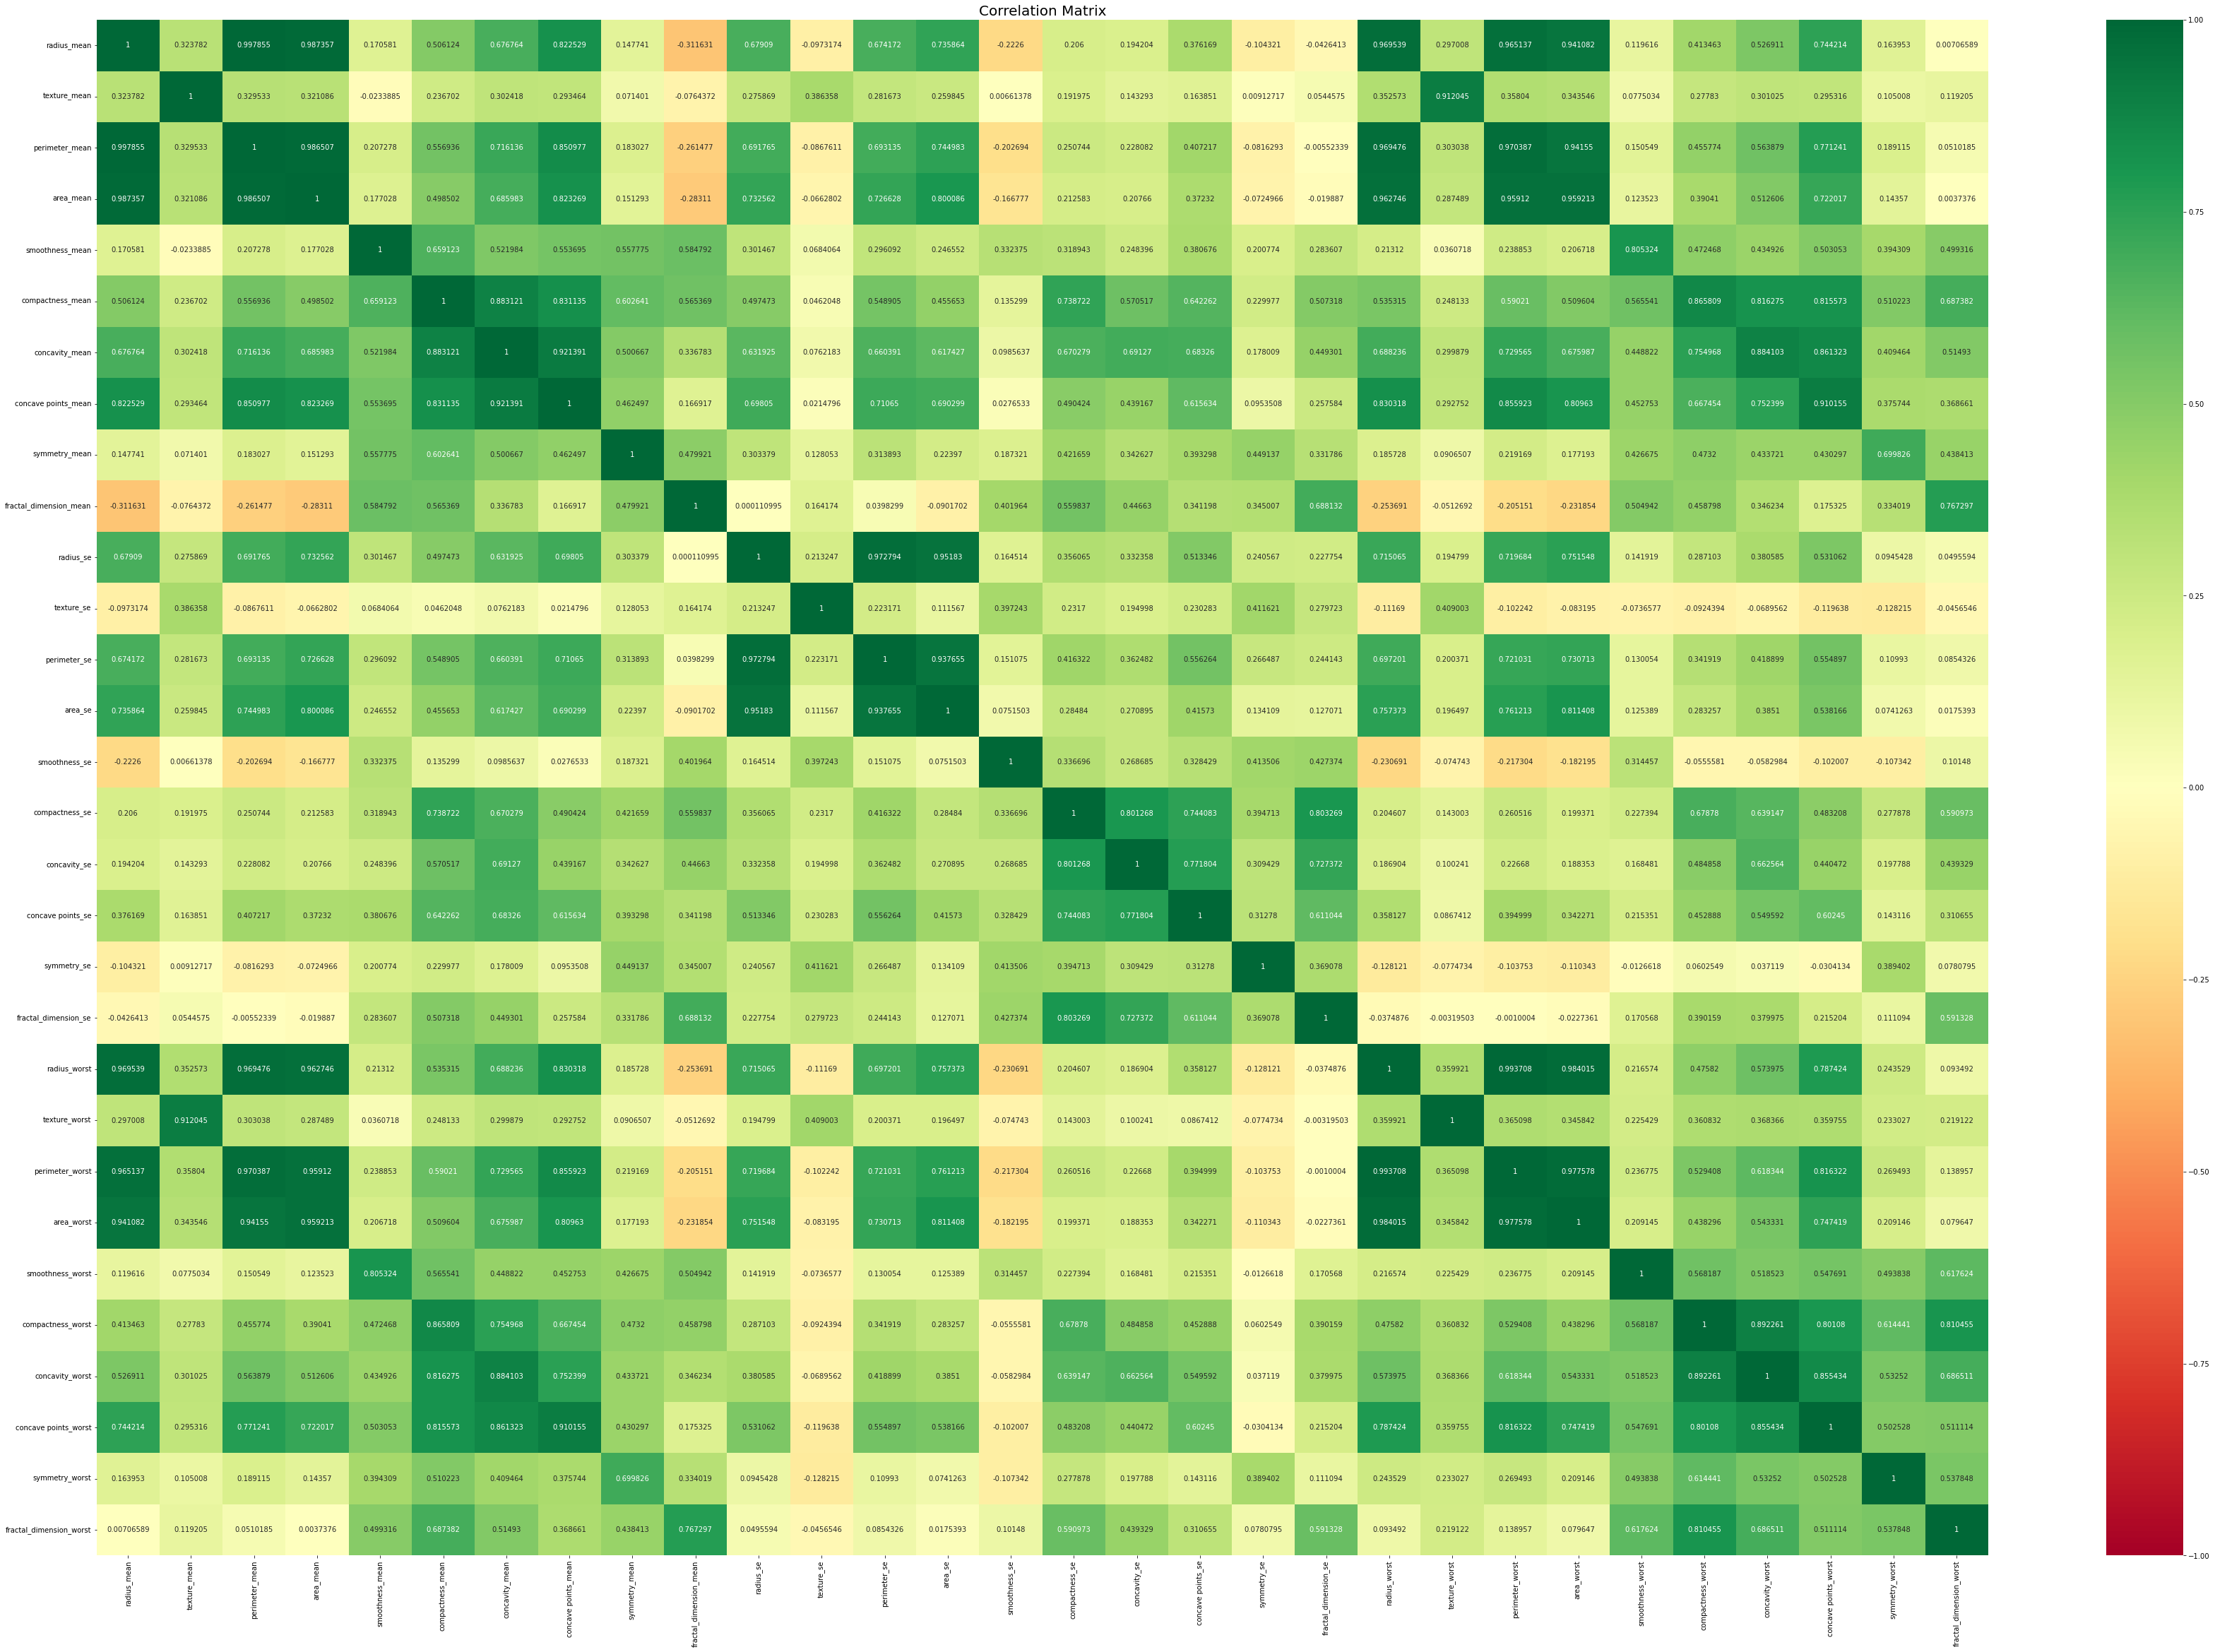

In [17]:
# Correlation Matrix Plotting
plt.figure(figsize=(60,40)) 
plt.title("Correlation Matrix", fontsize=20)
sns.heatmap(numeric.corr(),cmap='RdYlGn',annot=True,vmax=1.0,vmin=-1.0,fmt='g')  
#cmap is the color for heatmap, annot=True is to show the correlation matrix value on heatmap
#vmax and vmin are the threshold for the heatmap and fmt will create a scale
plt.show()

There is a high correlation among various variables

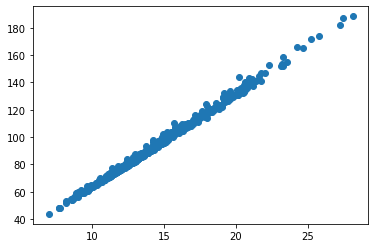

In [18]:
plt.scatter(df['radius_mean'], df['perimeter_mean'])
plt.show()

# Using PCA to remove multicollinearity

In [19]:
scaler  = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric)

In [20]:
pca  = PCA()
pca.fit(numeric_scaled)

PCA()

In [21]:
# how much of the total variance in the data is captured by each principal component.
explained_variance = pca.explained_variance_ratio_
print('Explained variance ratio for each component : ', explained_variance)

Explained variance ratio for each component :  [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


In [22]:
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components chosen : {n_components}')

Number of components chosen : 10


In [23]:
pca = PCA(n_components=n_components)
numeric_reduced = pca.fit_transform(numeric_scaled) # the reduced dataset 

In [24]:
numeric_reduced.shape

(569, 10)

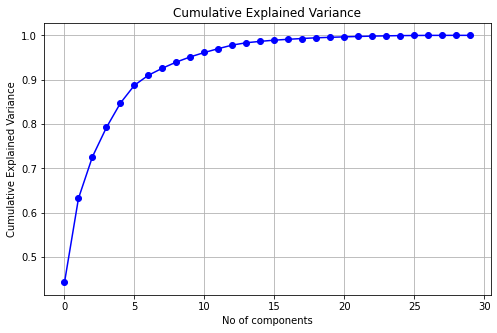

In [25]:
# Visualization of explained variance

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('No of components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [26]:
# Split to x and y
X = numeric_reduced
y = df['target']

In [27]:
# Train_test split 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

## Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', random_state=0, max_depth=6, min_samples_split=50)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [29]:
# Model Evaluation
y_pred_rf=rf.predict(X_test)

In [30]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))


Accuracy: 0.965034965034965
Precision 0.9607843137254902
Recall 0.9423076923076923


##  SVM Model

In [35]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [36]:
y_pred_svm = svm.predict(X_test)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision",metrics.precision_score(y_test,y_pred_svm))
print("Recall",metrics.recall_score(y_test,y_pred_svm))


Accuracy: 0.9790209790209791
Precision 0.9622641509433962
Recall 0.9807692307692307
